In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("kyphosis.csv")

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [9]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


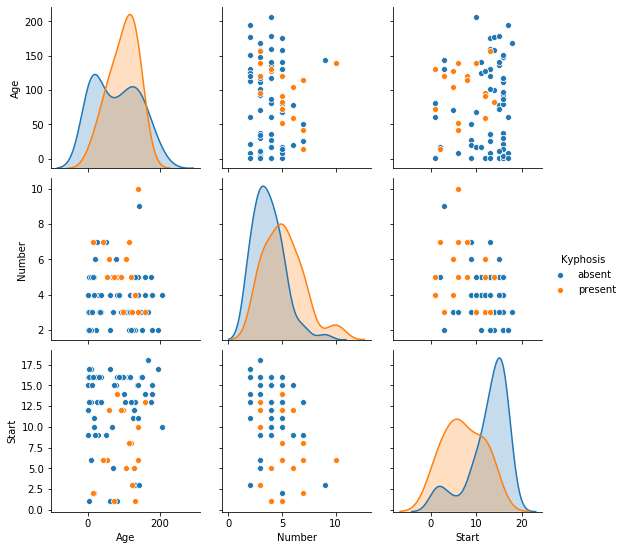

In [15]:
# plt.figure(figsize=(14,6))
sns.pairplot(df, hue="Kyphosis")

Build model

In [21]:
X = df.drop("Kyphosis", axis=1)
y = df["Kyphosis"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [57]:
dtree_model = DecisionTreeClassifier()

In [58]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
predictions = dtree_model.predict(X_test)

In [60]:
print(confusion_matrix(y_test, predictions))
print("\n\n\n")
print(classification_report(y_test, predictions))

[[19  3]
 [ 0  3]]




              precision    recall  f1-score   support

      absent       1.00      0.86      0.93        22
     present       0.50      1.00      0.67         3

    accuracy                           0.88        25
   macro avg       0.75      0.93      0.80        25
weighted avg       0.94      0.88      0.90        25



**Now, let's see how these results compare to a random forest model**

In [61]:
rand_forest_model = RandomForestClassifier(n_estimators=100)

In [62]:
rand_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
rand_forest_pred = rand_forest_model.predict(X_test)

In [64]:
print(confusion_matrix(y_test, rand_forest_pred))
print("\n\n\n")
print(classification_report(y_test, rand_forest_pred))

[[21  1]
 [ 1  2]]




              precision    recall  f1-score   support

      absent       0.95      0.95      0.95        22
     present       0.67      0.67      0.67         3

    accuracy                           0.92        25
   macro avg       0.81      0.81      0.81        25
weighted avg       0.92      0.92      0.92        25



So, it seems that the RF does provide better predictions...BUT: When I re-run this program, I get different results?

# Aside: Tree Visualization

In [70]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

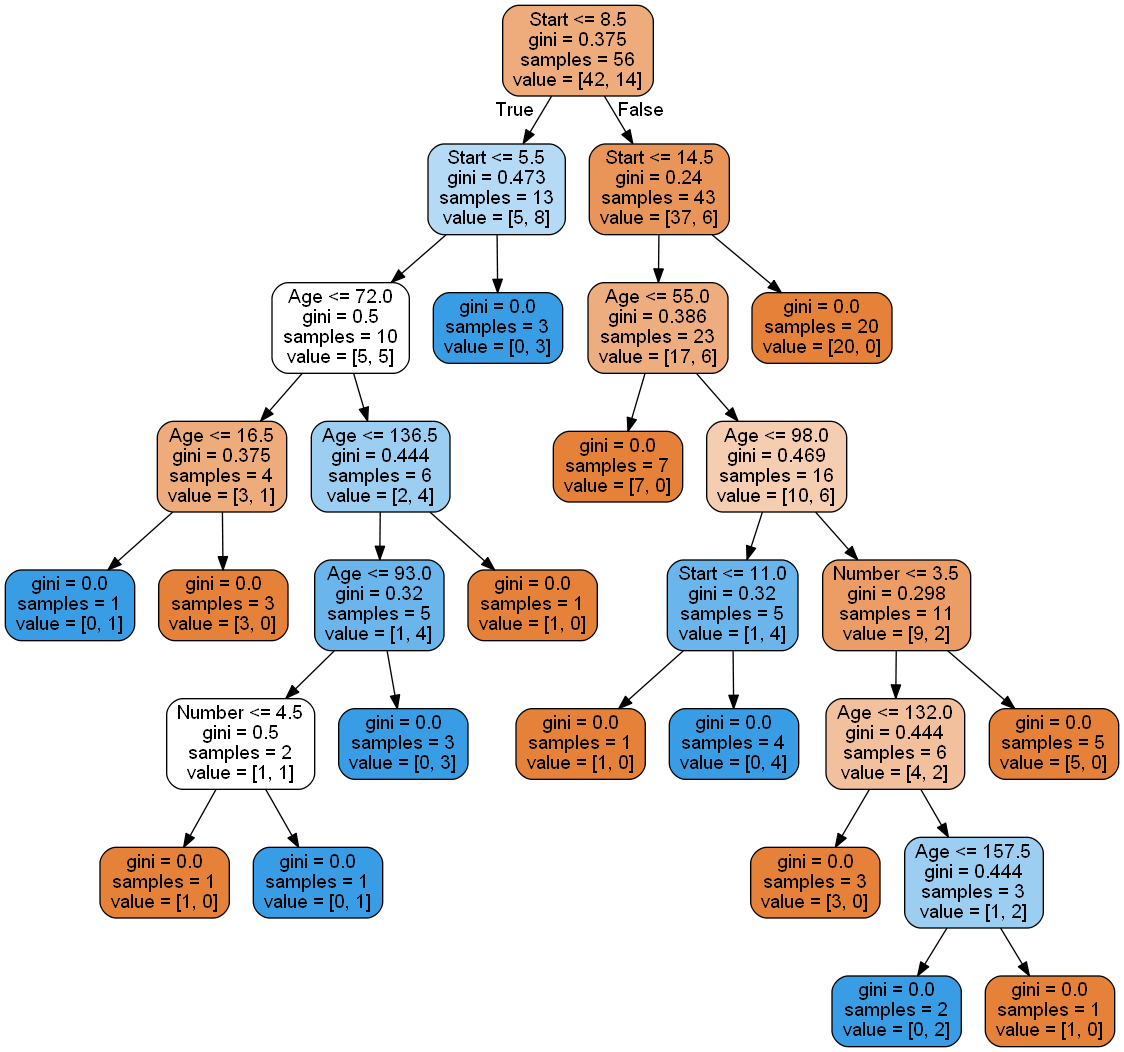

In [71]:
dot_data = StringIO()  
export_graphviz(dtree_model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 